<a href="https://colab.research.google.com/github/Spili11/DS_Praktikum/blob/main/NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import re


In [11]:
tokenizer = Tokenizer()
path = '/content/drive/MyDrive/DS_Praktikum/text_ML2.txt'
file = open(path, "r")
data = file.read()
file.close()

path = '/content/drive/MyDrive/DS_Praktikum/Babis.txt'
file = open(path, "r")
data_1 = file.read()
file.close()

data += data_1

In [13]:
data = data.replace('\n', "").replace('. ', '.')
m = re.search('\.[A-Z]', data)
while m:
  position = m.span()[0]
  data = data[:position] + "&" + data[position + 1 :]
  m = re.search('\.[A-Z]', data)
corpus = data.lower().split('&')

In [14]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [15]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i + 1]
    input_sequences.append(n_gram_sequence)

In [16]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

In [17]:
xs = input_sequences[:, :-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [26]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
#model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
628/628 [==============================] - 11s 18ms/step - loss: 6.9704 - accuracy: 0.0637
Epoch 2/100
628/628 [==============================] - 11s 18ms/step - loss: 5.7508 - accuracy: 0.1303
Epoch 3/100
628/628 [==============================] - 11s 18ms/step - loss: 4.6950 - accuracy: 0.1988
Epoch 4/100
628/628 [==============================] - 12s 19ms/step - loss: 3.1155 - accuracy: 0.3535
Epoch 6/100
628/628 [==============================] - 11s 18ms/step - loss: 2.5956 - accuracy: 0.4355
Epoch 7/100
628/628 [==============================] - 11s 18ms/step - loss: 2.2149 - accuracy: 0.4987
Epoch 8/100
628/628 [==============================] - 11s 18ms/step - loss: 1.9882 - accuracy: 0.5413
Epoch 9/100
628/628 [==============================] - 11s 18ms/step - loss: 1.8111 - accuracy: 0.5744
Epoch 10/100
628/628 [==============================] - 11s 18ms/step - loss: 1.6569 - accuracy: 0.6065
Epoch 11/100
628/628 [==============================] - 11s 18ms/step - 

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

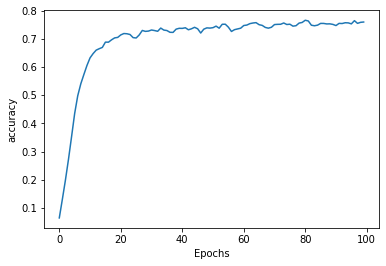

In [28]:
plot_graphs(history, 'accuracy')

In [29]:
seed_text = "Dámy a pánove, sešli jsme se tu"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Dámy a pánove, sešli jsme se tu důležité vůči byl už s trvalým nebo přechodným pobytem nad 90 dnů na území čr vycestovat z území čr to neplatí je li z vietnamu které jsme měli lidi šli jsme o tom jednali s maloobchodními řetězci a sociálních vámi i do 3 listopadu v pohybu našich občanů a dodržování různých nařízení ale jak jsem už vícekrát na to odpověděl a my děláme pro to abychom zabránili šíření koronaviru a pro lidi maximum pro to bylo to samozřejmě nesmysl byla všem takhle technologie na to jsem již za první vlny protože ještě jednou nakonec vláda rozhodla protože je dobře že
